## Data Analysis

In [1]:
import os
import sys
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

sys.path.append(os.path.dirname(os.getcwd()))

from data import Data

Using TensorFlow backend.


In [2]:
# Load dataset
data = Data('../data/signal_10_5820.tsv.gz', seed=123, pos=False)
data_pos = Data('../data/signal_10_5820.tsv.gz', seed=123)

### Checking distribution of labels

In [3]:
labels_train = data.label_encoder.inverse_transform(np.argmax(data.y_train, axis=1))
labels_val = data.label_encoder.inverse_transform(np.argmax(data.y_val, axis=1))
labels_test = data.label_encoder.inverse_transform(np.argmax(data.y_test, axis=1))

uniq_train, counts_train = np.unique(labels_train, return_counts=True)
uniq_val, counts_val = np.unique(labels_val, return_counts=True)
uniq_test, counts_test = np.unique(labels_test, return_counts=True)

/home/filip/.conda/envs/inf5820/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/filip/.conda/envs/inf5820/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/filip/.conda/envs/inf5820/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


/home/filip/.conda/envs/inf5820/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


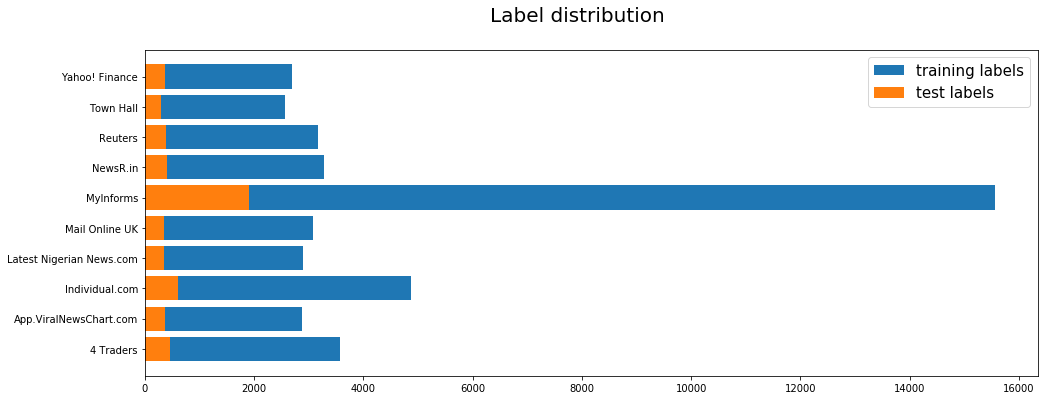

In [16]:
fig = plt.figure(figsize=(16, 6))
fig.suptitle('Label distribution', fontsize=20)

ax = fig.add_subplot(111)
ax.barh(uniq_train, counts_train, label='training labels')
ax.barh(uniq_test, counts_test, label='test labels')
ax.legend(fontsize=15)
fig.show()

plt.savefig('../figures/label_distribution.pgf')

### Word Distribution

#### Words without POS tags

In [6]:
word_counts = data.tokenizer.word_counts

print('Number of words: {}'.format(len(word_counts)))
df1 = pd.DataFrame.from_records(
    sorted(word_counts.items(), key=operator.itemgetter(1), reverse=True),
    columns=['word', 'count'])

print('saving to latex table...')
with open('../report/table_word_count.tex', 'w') as f:
    f.write(df1[:10].to_latex())

df1.head(10)

Number of words: 274789
saving to latex table...


,word,count
0,say,65933
1,company,49392
2,new,41332
3,year,37954
4,market,31059
5,also,29244
6,make,28596
7,include,27673
8,share,26650
9,report,24885


#### Words with POS tags

In [7]:
word_counts_pos = data_pos.tokenizer.word_counts

print('Number of words: {}'.format(len(word_counts_pos)))
df2 = pd.DataFrame.from_records(
    sorted(word_counts_pos.items(), key=operator.itemgetter(1), reverse=True),
    columns=['word', 'count'])

print('saving to latex table...')
with open('../report/table_word_count_POS.tex', 'w') as f:
    f.write(df2[:10].to_latex())

df2.head(10)

Number of words: 292989
saving to latex table...


,word,count
0,say_vb,65864
1,company_nn,49392
2,year_nn,37954
3,market_nn,30480
4,also_rb,29064
5,make_vb,28501
6,include_vb,27651
7,new_jj,27539
8,time_nn,22642
9,share_nn,21308


#### Plotting the word distribution

/home/filip/.conda/envs/inf5820/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


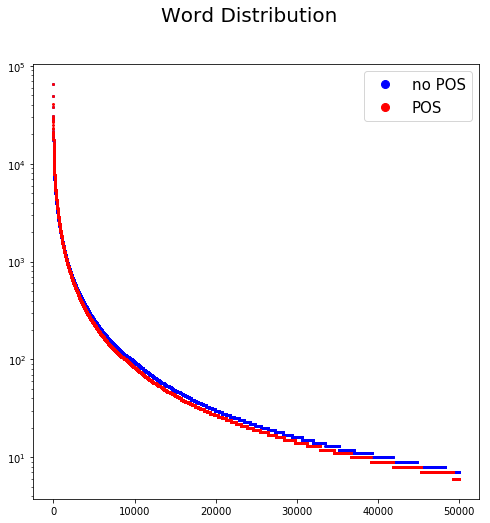

In [12]:
fig_2 = plt.figure(figsize=(8, 8))
fig_2.suptitle('Word Distribution', fontsize=20)
ax = fig_2.add_subplot(111)
plt.yscale('log')
ax.plot(df2['count'][:50000], 'bo',markersize=2, label='no POS')
ax.plot(df1['count'][:50000], 'ro', markersize=2, label='POS')
ax.legend(fontsize=15, markerscale=4)
fig_2.show()

